In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xgb
from catboost import CatBoostRegressor
# from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [3]:
tips = sns.load_dataset('tips')
X = tips.drop('tip', axis=1)
y = tips['tip']

In [4]:
# label encode X
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['sex'] = le.fit_transform(X['sex'])
X['smoker'] = le.fit_transform(X['smoker'])
X['day'] = le.fit_transform(X['day'])
X['time'] = le.fit_transform(X['time'])

In [5]:
# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# creat the model
model = RandomForestRegressor()
# train the model
model.fit(X_train, y_train)
# predict
y_pred1 = model.predict(X_test)
# evaluate the regression model
print("RandomForestRegressor R2 score: ",r2_score(y_test, y_pred1))

RandomForestRegressor R2 score:  0.27805388193821756


In [7]:
# creat the model
model = GradientBoostingRegressor()
# train the model
model.fit(X_train, y_train)
# predict
y_pred2 = model.predict(X_test)
# evaluate the regression model
print("GradientBoostingRegressor R2 score: ",r2_score(y_test, y_pred2))

GradientBoostingRegressor R2 score:  0.359629112359085


In [8]:
# creat the model
model = AdaBoostRegressor()
# train the model
model.fit(X_train, y_train)
# predict
y_pred3 = model.predict(X_test)
# evaluate the regression model
print("GradientBoostingRegressor R2 score: ",r2_score(y_test, y_pred3))

GradientBoostingRegressor R2 score:  0.195675050026477


In [9]:
# creat the model
model = xgb.XGBRegressor()
# train the model
model.fit(X_train, y_train)
# predict
y_pred = model.predict(X_test)
# evaluate the regression model
print("GradientBoostingRegressor R2 score: ",r2_score(y_test, y_pred))

GradientBoostingRegressor R2 score:  0.40884920227805865


In [10]:
# creat the model
model = CatBoostRegressor()
# train the model
model.fit(X_train, y_train, verbose=False)
# predict
y_pred4 = model.predict(X_test)
# evaluate the regression model
print("GradientBoostingRegressor R2 score: ",r2_score(y_test, y_pred4))

GradientBoostingRegressor R2 score:  0.35770490928855025


Text(0, 0.5, 'y_pred')

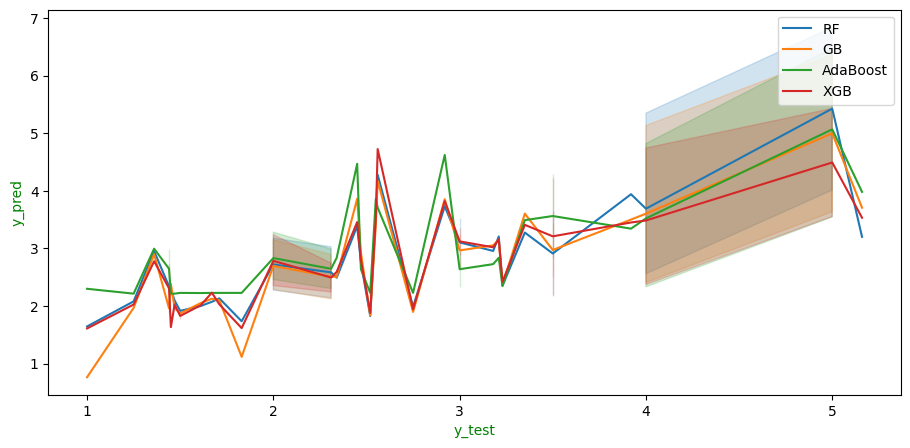

In [11]:
fig, ax = plt.subplots(figsize=(11, 5))

ax = sns.lineplot(x=y_test, y=y_pred1,
				label='RF')
ax1 = sns.lineplot(x=y_test, y=y_pred2,
				label='GB')
ax2 = sns.lineplot(x=y_test, y=y_pred3,
				label='AdaBoost')
ax3 = sns.lineplot(x=y_test, y=y_pred4,
				label='XGB')

ax.set_xlabel('y_test', color='g')
ax.set_ylabel('y_pred', color='g')